**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as pl

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df=pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
print(df.shape)

(310, 7)


In [4]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [6]:
df.info()

# There are no missing values and the data type of all columns are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [7]:
df['class'].unique()

# There aren't any suspectful values in the 'Class' column

array(['Abnormal', 'Normal'], dtype=object)

In [8]:
# Performing some basic EDA to check the sample statistics

df.describe().transpose()

# It's observed that all columns except pelvic_radius have a right skew as indicated by the large difference between Q3 and max
# The degree_spondylolisthesis column especially has a very long tail making it look very suspicious

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


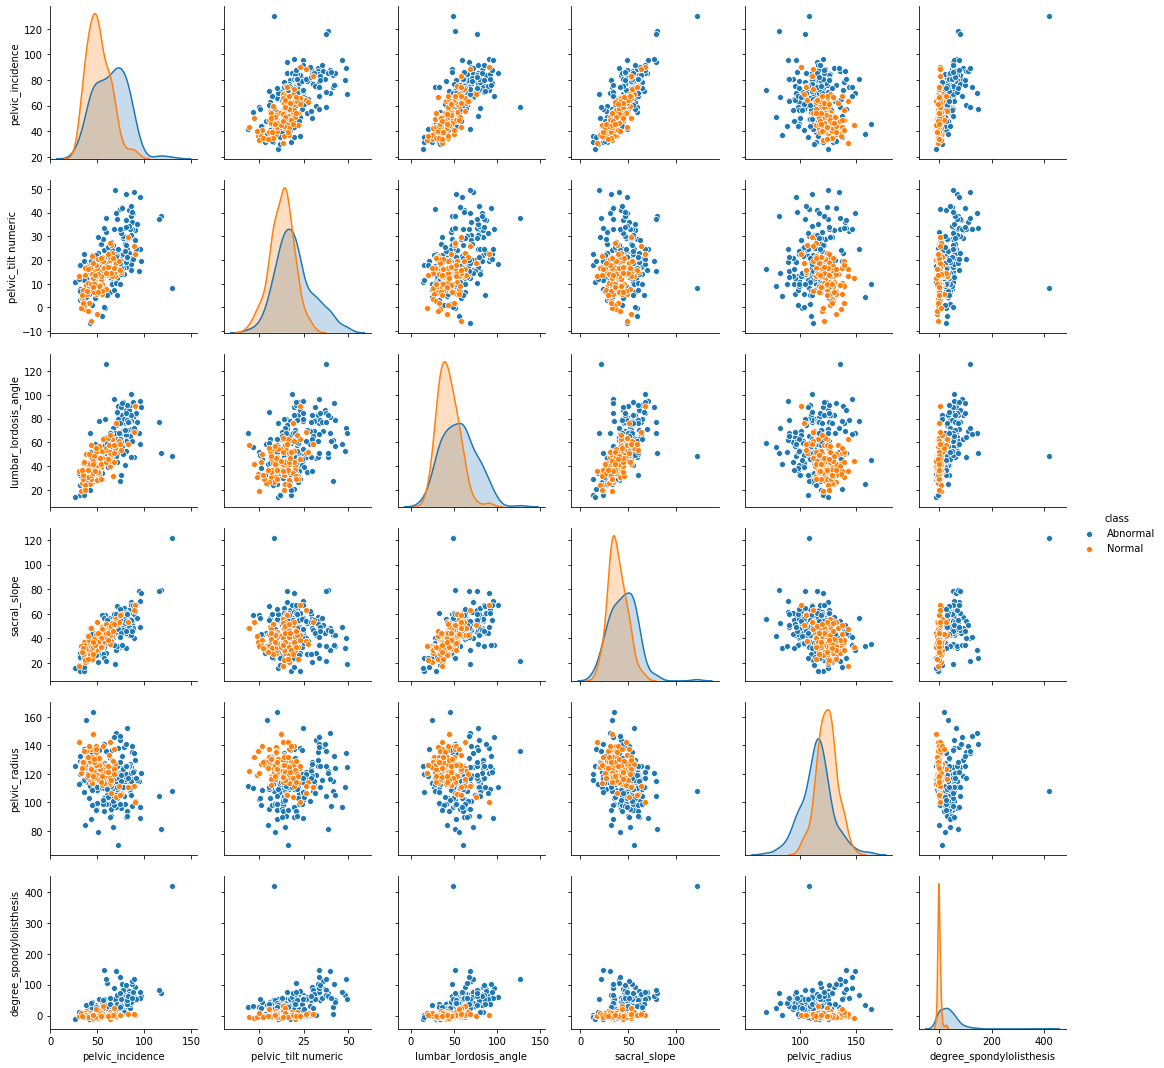

In [9]:
# A pair plot or a box plot will help visualize the skew created by outliers more clearly.
# While a boxplot is more punishing towards outliers, a pairplot gives an idea of the distribution and we can take a more conservative approach (such as z-score) to remove outliers
# Given the lack of subject matter knowledge, I'm taking the more conservative approach to outlier removal by using pairplot and z-scores 

sns.pairplot(df,diag_kind='kde',hue='class')

# As suspected, the 'degree_spondylolisthesis' column seems to have a data point that's completely different from other data points. 

# The other columns such as pelvic_incidence, and sacral_slope also seem to have some doubtfully high values.
# exploring them further will give some more idea

In [10]:
# Using the zscore to identify potential outliers
# We find the z-score of each column and check the values with z>3 and explore them further

z1 = np.abs(stats.zscore(df['pelvic_incidence']))
z2 = np.abs(stats.zscore(df['pelvic_tilt numeric']))
z3 = np.abs(stats.zscore(df['lumbar_lordosis_angle']))
z4 = np.abs(stats.zscore(df['sacral_slope']))
z5 = np.abs(stats.zscore(df['pelvic_radius']))
z6 = np.abs(stats.zscore(df['degree_spondylolisthesis']))

In [11]:
print(np.where(z1 > 3),'\n',np.where(z2 > 3),'\n',np.where(z3 > 3),'\n',np.where(z4 > 3),'\n',np.where(z5 > 3),'\n',np.where(z6 > 3))

(array([115, 162, 163], dtype=int64),) 
 (array([122, 141, 179], dtype=int64),) 
 (array([197], dtype=int64),) 
 (array([115], dtype=int64),) 
 (array([ 85, 167, 180], dtype=int64),) 
 (array([ 75,  95, 115], dtype=int64),)


In [12]:
# We can analyse the potential outliers and decide the ones that need to be removed

outlier_rows_check=df.iloc[[115,162,163,122,141,179,197,85,167,180,75,95],:]
outlier_rows=df.iloc[[115],:]
outliers_index=outlier_rows.index
outlier_rows_check

# The observation at index 115 seems to be a consistent outlier across 3 features - pelvic_incidence, sacral_slope, and degree_spondylolisthesis
# All other observations are not consistent outliers across multiple features

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Abnormal
162,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,Abnormal
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Abnormal
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,Abnormal
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,Abnormal
179,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,Abnormal
197,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Abnormal
85,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Abnormal
167,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,Abnormal
180,37.903910,4.479099,24.710274,33.424811,157.848799,33.607027,Abnormal


In [13]:
# Comparing the observation at index 115 with the stats

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [14]:
# Dropping the observation at index 115 as an outlier

new_df=df.drop(df.index[[outliers_index]])
new_df.shape

C:\Users\rajdb\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(309, 7)

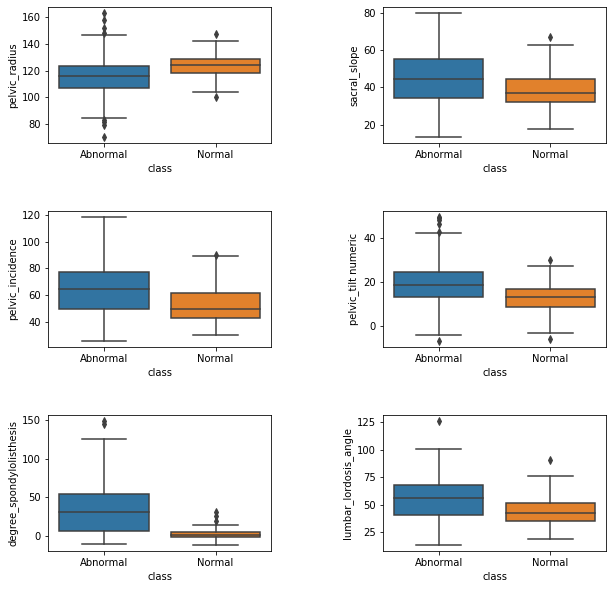

In [15]:
# Using boxplot to plot each feature vs. class to see if there's a difference in the distribution between classes

f,ax=plt.subplots(3,2,figsize=(10,10))
f.subplots_adjust(wspace=0.5,hspace=0.5)

sns.boxplot(new_df['class'],new_df['pelvic_radius'],ax=ax[0][0])
sns.boxplot(new_df['class'],new_df['sacral_slope'],ax=ax[0][1])
sns.boxplot(new_df['class'],new_df['pelvic_incidence'],ax=ax[1][0])
sns.boxplot(new_df['class'],new_df['pelvic_tilt numeric'],ax=ax[1][1])
sns.boxplot(new_df['class'],new_df['degree_spondylolisthesis'],ax=ax[2][0])
sns.boxplot(new_df['class'],new_df['lumbar_lordosis_angle'],ax=ax[2][1])

# pelvic_radius and degree_spondylolisthesis features seem to have some level of difference in the Abnormal vs. Normal distributions
# This indicates that these could be important features is determining the class

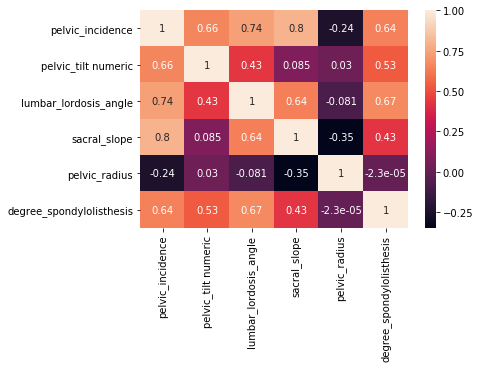

In [16]:
# To check if there are redundant features, we can use the correlation matrix

temp=new_df.drop('class',axis=1)
corr=new_df.corr()
sns.heatmap(corr,annot=True)

# We see a correlation of +0,8 between pelvic_incidence and sacral_slope. 
# We also see a correlation of +0.74 between pelvic_incidence and lumbar_lordosis_angle.
# Hence, we would be dropping pelvic_incidence as it is represented well by lumbar_lordosis_angle and sacral_slope

In [17]:
# Removing 'pelvic_incidence' since it is highly correlated with other features as shown in the correlation matrix above
# 'pelvic_incidence' is represented well by lumbar_lordosis_angle and sacral_slope

new_df_2=new_df.drop(['pelvic_incidence'],axis=1)

# Encode the Class variable to integer.

In [18]:
labelencoder = LabelEncoder()
new_df_2['class'] = labelencoder.fit_transform(new_df_2['class'])

In [19]:
new_df_2.head()

,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [20]:
new_df_features=new_df_2.drop(['class'],axis=1)
new_df_features.head()

,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,22.552586,39.609117,40.475232,98.672917,-0.254400
1,10.060991,25.015378,28.995960,114.405425,4.564259
2,22.218482,50.092194,46.613539,105.985135,-3.530317
3,24.652878,44.311238,44.644130,101.868495,11.211523
4,9.652075,28.317406,40.060784,108.168725,7.918501


In [21]:
X=new_df_features
y=new_df_2[['class']]

# Normalize your Data (X) to get values between 0 to 1.

In [22]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X = pd.DataFrame(X, columns=new_df_features.columns)
X.head()

,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.519900,0.229180,0.408699,0.307461,0.067603
1,0.296783,0.098578,0.235632,0.476649,0.097755
2,0.513932,0.322995,0.501244,0.386097,0.047105
3,0.557414,0.271260,0.471552,0.341826,0.139349
4,0.289479,0.128129,0.402451,0.409579,0.118744


# Split the dat as train and test with a ratio of 70:30.

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [24]:
# Creating a KNN object with a sample k-value of 5 

NHH=KNeighborsClassifier(n_neighbors=5)
NHH.fit(X_train,y_train)

C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
# Predicting the class on the data set

predicted_labels=NHH.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [26]:
# Measuring accuracy

NHH.score(X_test,y_test)

0.8387096774193549

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [27]:
# Creating a list of k-values from 1 to sqrt(n) as indicated by the thumb rule for optimal k-value

k_values=[var for var in range(1,int(round(np.sqrt(len(new_df_2))))) if var % 2 != 0]

In [28]:
k_values

[1, 3, 5, 7, 9, 11, 13, 15, 17]

In [29]:
# Running the KNN model for all odd values from 1 to 17

appended_data=[]
def optimal_k(i):
    model_optimal = KNeighborsClassifier(n_neighbors=i)
    model_optimal.fit(X_train,y_train)
    predicted_labels=model_optimal.predict(X_test)
    print("Score for k={} {}".format(i,model_optimal.score(X_test,y_test)))
    return model_optimal.score(X_test,y_test)
for i in k_values:
    appended_data.append(optimal_k(i))

# We see that 17, which is closest to the sqrt(n), is the optimal k-value

C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

Score for k=1 0.8064516129032258
Score for k=3 0.8064516129032258
Score for k=5 0.8387096774193549
Score for k=7 0.8387096774193549
Score for k=9 0.8387096774193549
Score for k=11 0.8494623655913979
Score for k=13 0.8602150537634409
Score for k=15 0.8817204301075269
Score for k=17 0.8817204301075269


C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


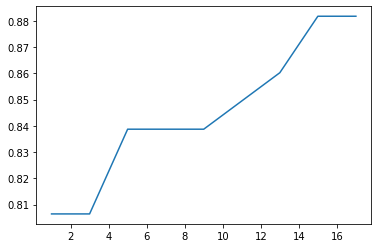

In [30]:
sns.lineplot(k_values,y=appended_data)

In [31]:
# Running the KNN model again with k=17

NHH17=KNeighborsClassifier(n_neighbors=17)
NHH17.fit(X_train,y_train)
predicted_labels=NHH17.predict(X_test)
NHH17.score(X_test,y_test)

C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8817204301075269

In [32]:
#Creating the confusion matrix for the KNN model with k=17

confusion_matrix(predicted_labels,y_test)

array([[56,  4],
       [ 7, 26]], dtype=int64)

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [33]:
df_3C=pd.read_csv('3Classdata.csv')

In [34]:
df_3C.shape

(310, 7)

In [35]:
df_3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [36]:
df_3C.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [37]:
# There are no null values and the data types of all features are correct

df_3C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [38]:
df_3C['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [39]:
# Performing some basic EDA to check the sample statistics

df_3C.describe().T

# It's observed that all columns except pelvic_radius have a right skew as indicated by the large difference between Q3 and max
# The degree_spondylolisthesis column especially has a very long tail making it look very suspicious

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [40]:
# Using the zscore to identify potential outliers
# We find the z-score of each column and check the values with z>3 and explore them further

z1a = np.abs(stats.zscore(df_3C['pelvic_incidence']))
z2a = np.abs(stats.zscore(df_3C['pelvic_tilt']))
z3a = np.abs(stats.zscore(df_3C['lumbar_lordosis_angle']))
z4a = np.abs(stats.zscore(df_3C['sacral_slope']))
z5a = np.abs(stats.zscore(df_3C['pelvic_radius']))
z6a = np.abs(stats.zscore(df_3C['degree_spondylolisthesis']))

In [41]:
print(np.where(z1a > 3),'\n',np.where(z2a > 3),'\n',np.where(z3a > 3),'\n',np.where(z4a > 3),'\n',np.where(z5a > 3),'\n',np.where(z6a > 3))

(array([115, 162, 163], dtype=int64),) 
 (array([122, 141, 179], dtype=int64),) 
 (array([197], dtype=int64),) 
 (array([115], dtype=int64),) 
 (array([ 85, 167, 180], dtype=int64),) 
 (array([ 75,  95, 115], dtype=int64),)


In [42]:
# We can analyse the potential outliers and decide the ones that need to be removed

outlier_rows_check=df_3C.iloc[[115,162,163,122,141,179,197,85,167,180,75,95],:]
outlier_rows=df_3C.iloc[[115],:]
outliers_index=outlier_rows.index
outlier_rows_check

# The observation at index 115 seems to be a consistent outlier across 3 features - pelvic_incidence, sacral_slope, and degree_spondylolisthesis
# All other observations are not consistent outliers across multiple features

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis
162,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,Spondylolisthesis
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Spondylolisthesis
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,Spondylolisthesis
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,Spondylolisthesis
179,68.721910,49.431864,68.056012,19.290046,125.018517,54.691289,Spondylolisthesis
197,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Spondylolisthesis
85,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,Spondylolisthesis
167,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,Spondylolisthesis
180,37.903910,4.479099,24.710274,33.424811,157.848799,33.607027,Spondylolisthesis


In [43]:
# Dropping the observation at index 115 as an outlier

new_df_3C=df_3C.drop(df_3C.index[[outliers_index]])
new_df_3C.shape

C:\Users\rajdb\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(309, 7)

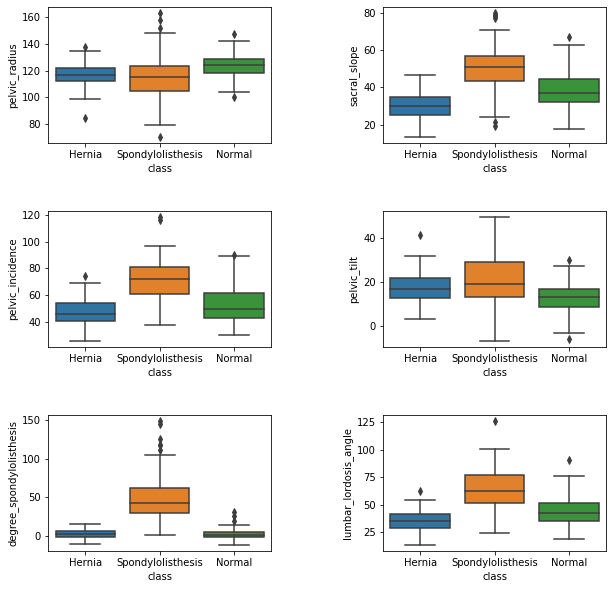

In [44]:
# Using boxplot to plot each feature vs. class to see if there's a difference in the distribution between classes

f,ax=plt.subplots(3,2,figsize=(10,10))
f.subplots_adjust(wspace=0.5,hspace=0.5)

sns.boxplot(new_df_3C['class'],new_df_3C['pelvic_radius'],ax=ax[0][0])
sns.boxplot(new_df_3C['class'],new_df_3C['sacral_slope'],ax=ax[0][1])
sns.boxplot(new_df_3C['class'],new_df_3C['pelvic_incidence'],ax=ax[1][0])
sns.boxplot(new_df_3C['class'],new_df_3C['pelvic_tilt'],ax=ax[1][1])
sns.boxplot(new_df_3C['class'],new_df_3C['degree_spondylolisthesis'],ax=ax[2][0])
sns.boxplot(new_df_3C['class'],new_df_3C['lumbar_lordosis_angle'],ax=ax[2][1])

# sacral_slope, degree_spondylolisthesis, and lumbar_lordosis_angle features seem to have some level of difference across the 3 classes
# This indicates that these could be important features is determining the class

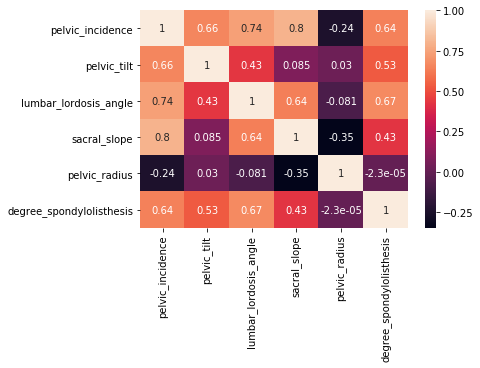

In [45]:
# To check if there are redundant features, we can use the correlation matrix

temp=new_df_3C.drop('class',axis=1)
corr=new_df_3C.corr()
sns.heatmap(corr,annot=True)

# We see a correlation of +0,8 between pelvic_incidence and sacral_slope. 
# We also see a correlation of +0.74 between pelvic_incidence and lumbar_lordosis_angle.
# Hence, we would be dropping pelvic_incidence as it is represented well by lumbar_lordosis_angle and sacral_slope (Note that this is done while creating the feature set new_df_features)

In [46]:
# Removing 'pelvic_incidence' since it is highly correlated with other features as shown in the correlation matrix above
# 'pelvic_incidence' is represented well by lumbar_lordosis_angle and sacral_slope

new_df_3C_2=new_df_3C.drop(['pelvic_incidence'],axis=1)

# Encode the Class variable to integer.

In [47]:
labelencoder = LabelEncoder()
new_df_3C_2['class'] = labelencoder.fit_transform(new_df_3C_2['class'])

In [48]:
new_df_3C_2['class'].unique()

array([0, 2, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [49]:
new_df_3C_features=new_df_3C_2.drop(['class'],axis=1)
new_df_3C_features.head()

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,22.552586,39.609117,40.475232,98.672917,-0.254400
1,10.060991,25.015378,28.995960,114.405425,4.564259
2,22.218482,50.092194,46.613539,105.985135,-3.530317
3,24.652878,44.311238,44.644130,101.868495,11.211523
4,9.652075,28.317406,40.060784,108.168725,7.918501


In [50]:
X=new_df_3C_features
y=new_df_3C_2[['class']]

# Normalize your Data (X) to get values between 0 to 1.

In [51]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X = pd.DataFrame(X, columns=new_df_3C_features.columns)
X.head()

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.519900,0.229180,0.408699,0.307461,0.067603
1,0.296783,0.098578,0.235632,0.476649,0.097755
2,0.513932,0.322995,0.501244,0.386097,0.047105
3,0.557414,0.271260,0.471552,0.341826,0.139349
4,0.289479,0.128129,0.402451,0.409579,0.118744


# Split the dat as train and test with a ratio of 70:30.

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [53]:
# Running the KNN model again with k=5

NHH=KNeighborsClassifier(n_neighbors=5)
NHH.fit(X_train,y_train)

C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Calculate the performance score of of your classification on test dataset.

In [54]:
predicted_labels=NHH.predict(X_test)
NHH.score(X_test,y_test)

0.8064516129032258

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [55]:
# Creating a list of k-values from 1 to sqrt(n) as indicated by the thumb rule for appropriate k-value

k_values=[var for var in range(1,int(round(np.sqrt(len(new_df_3C_2))))) if var % 2 != 0]

In [56]:
k_values

[1, 3, 5, 7, 9, 11, 13, 15, 17]

In [57]:
# Running the KNN model for all odd values from 1 to 17

appended_data=[]
def optimal_k(i):
    model_optimal = KNeighborsClassifier(n_neighbors=i)
    model_optimal.fit(X_train,y_train)
    predicted_labels=model_optimal.predict(X_test)
    print("Score for k={} {}".format(i,model_optimal.score(X_test,y_test)))
    return model_optimal.score(X_test,y_test)
for i in k_values:
    appended_data.append(optimal_k(i))

# We see that 11 is the optimal k-value

C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

Score for k=1 0.7741935483870968
Score for k=3 0.8064516129032258
Score for k=5 0.8064516129032258
Score for k=7 0.8279569892473119
Score for k=9 0.8602150537634409
Score for k=11 0.8709677419354839
Score for k=13 0.8387096774193549
Score for k=15 0.8602150537634409
Score for k=17 0.8602150537634409


C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


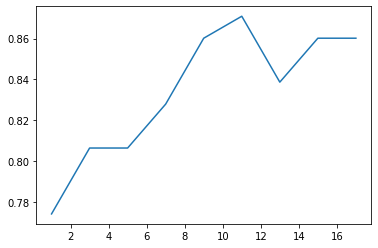

In [58]:
sns.lineplot(k_values,y=appended_data)

In [59]:
# Running the KNN model again with k=11

NHH11=KNeighborsClassifier(n_neighbors=11)
NHH11.fit(X_train,y_train)
predicted_labels=NHH11.predict(X_test)
NHH11.score(X_test,y_test)

C:\Users\rajdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8709677419354839

In [60]:
confusion_matrix(predicted_labels,y_test)

array([[13,  5,  1],
       [ 5, 22,  1],
       [ 0,  0, 46]], dtype=int64)